<a href="https://colab.research.google.com/github/waqasisme/FestoCodingChallenge2022/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeFest 22**
# **Introduction**


In [284]:
import pandas as pd
df = pd.read_csv('office_database.csv', names= ["Username", "ID", "AccessKey", "FirstLoginTime"])
df.head()

,Username,ID,AccessKey,FirstLoginTime
0,immenseResearch,500025,211,08:04
1,great.night,648341,6,09:04
2,gray_basket,478873,82,07:15
3,bubblyPerson,294887,208,09:03
4,WorriedLine,489479,231,07:47


In [287]:
id_match = df['ID'].apply(lambda f: "814" in str(f)) # matching ID numbers
sum(id_match)

91

In [288]:
can_go_kitchen = df['AccessKey'].apply(lambda f: f & 8 != 0) # people with access to module 5
sum(can_go_kitchen)

93

In [289]:
from datetime import datetime
# cleaning up first login time column to trim strings and fix format
df['FirstLoginTime'] = df['FirstLoginTime'].apply(lambda f: f.strip())
df['FirstLoginTime'] = df['FirstLoginTime'].apply(lambda f: '12:12' if f == '99:99' else f)
df['FirstLoginTime'] = pd.to_datetime(df.FirstLoginTime, format='%H:%M')
# python turned them into full date time objects, in hindsight should've just used epoch 
could_be_there = df['FirstLoginTime'].apply(lambda d: d < datetime.strptime('1900-01-01 07:14:00', '%Y-%m-%d %H:%M:%S'))
sum(could_be_there)


86

## Introduction Solution

In [291]:
# people that meet each condition
df[id_match & can_go_kitchen & could_be_there] # answer to introduction (HQ)

,Username,ID,AccessKey,FirstLoginTime
4574,mystery_man,814217,26,1900-01-01 07:08:00


# **Episode 1** 

In [127]:
# our person class for easy mapping with a helper function for later (to determine picoBots in blood)
from typing import List
class Person:
  name: str
  id: int
  homePlanet: str
  bloodSample: List[str]

  def __init__(self, name, id, homePlanet, bloodSample):
    self.name = name
    self.id = id
    self.homePlanet = homePlanet
    self.bloodSample = bloodSample
    
  # checks blood sample and it's transpose for the word pico
  def hasPicoBots(self) -> bool:
    rotated_bloodSample = []
    for j in range(8):
      rotated_bloodSample.append("".join([self.bloodSample[i][j] for i in range(6)]))
    # print(rotated_bloodSample)
    return any(['pico' in line or 'ocip' in line for line in self.bloodSample]) \
    or any(['pico' in line or 'ocip' in line for line in rotated_bloodSample]) 
                                                                                       

In [40]:
# utility function to test different blood samples from clean and gen1 files
def arg_cleaner(arg):
  '''+--------+
  |    pico|
  | ppco ci|
  |op c    |
  |c c poco|
  |pcp  cpi|
  |ciccccoo|
  +--------+'''
  arg = [line.strip()[1:-1] for line in arg.split('\n')[1:-1]]
  return arg

## **(1.1) Puzzle 1**

In [292]:
# compile population dataset
population = []
l = []
with open('population.txt', 'r') as file:
    l = file.readlines()

# loop over data 14 lines at a time to clean it up and store as person objects
for i in range(0, len(l), 14):
  person = l[i:i + 14]
  name = " ".join(person[0].split()[1:]) # skip 'Name: ' 
  id = int(person[1].split()[1]) # skip 'ID: '
  home = " ".join(person[2].split()[2:]) # skip 'home planet: '
  bs = [line.strip()[1:-1] for line in person[3:][2:8]] # read bloodSample as list of str, trimming whitespace removing | and +- lines (only storing chars)
  population.append(Person(name, id, home, bs))
  
print(len(population)) # check/verify size of pop with file


12732


In [303]:
sum([person.id for person in population if person.hasPicoBots()]) # answer to puzzle 1

2288948789

## **(1.2) Puzzle 2**

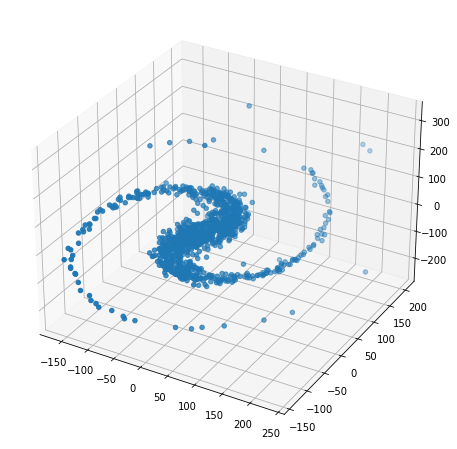

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# make a dict for galaxy_map with (name, coordinates)
galaxy_map = {}
x, y, z = [], [], []

with open('galaxy_map.txt') as glx:
  lines = [line.split(':') for line in glx.readlines()]
  for line in lines:
    planet = line[0].strip()
    coordinates = tuple(map(int, line[1].strip()[1:-1].split(',')))
    galaxy_map[planet] = coordinates 
    x.append(coordinates[0])
    y.append(coordinates[1])
    z.append(coordinates[2])

# plot galaxy to visualize outliers
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
plt.show()

In [295]:
#! pip install scikit-spatial
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

# find best fitting plane for our coordinates
points = Points([list(v) for k, v in galaxy_map.items()])
plane = Plane.best_fit(points)
distances = dict([(k, plane.distance_point(list(v))) for k, v in galaxy_map.items()])
outliers = dict([(k, v) for k, v in distances.items() if v > 2]) # outlier limit specified in question
outliers

{'Algo Major': 17.094076994006272,
 'Alpha Andron': 18.570147347806227,
 'Alpha Aurnus': 15.30644512387339,
 'Alpha Carsa': 16.558030382638748,
 'Alpha Lupisci': 17.01317619023222,
 'Alpha Menax Minor': 14.679062809785268,
 'Andros Major': 18.15572354742764,
 'Aquarth': 17.330929522841473,
 'Beta Dela IV': 19.695138612851604,
 'Carda III': 15.722061712776394,
 'Cerenis V': 18.505882337039477,
 'Cralis III': 15.23428215897532,
 'Dralis II': 17.43018479591629,
 'Earia': 20.09897682279569,
 'Equila Minor': 17.092541439010297,
 'Erinix': 17.83350330363349,
 'Forale': 18.473352389560475,
 'Gamma Bores': 15.069918330075517,
 'Gamma Carinus Major': 17.048515571908123,
 'Minoces': 16.853352118091596,
 'Phoeni V': 17.54729203485332,
 'Pisci': 16.763092834422906,
 'Vens IV': 18.294465731222203,
 'Venta': 17.39189067372093,
 'Viria II': 19.426604266384306}

In [296]:
sum([person.id for person in population if person.homePlanet in outliers.keys()]) # answer to puzzle 2

2438905648

## **(1.3) Puzzle 3**

In [152]:
# sequence of places retrieved from Jelly Jones' fitbit watch
jelly_jones_sequence = ['Junkyard', 'Pod Racing Track', 'Pod Racing Track', 'Palace', 'Factory']

In [250]:
from collections import OrderedDict

# read data from security_log
with open('security_log.txt', 'r') as file:
  lines = file.readlines()


# into a structure with { people: [places]} (places are inserted in order of time)

# convert 24hr to minute of day
def minute_of_day(time):
  hours, minutes = list(map(int, time.split(':')))
  return hours * 60 + minutes

people = {}
blacklist = set()
i = 0
while i < len(lines):
  line = lines[i]
  if 'Place' in line:
    last_place = line.split(':')[1].strip()
  elif 'in:' in line or 'out:' in line: # in/out list colon added to avoid names like 'edwin'
    last_people = line.split(':')[1].strip().split(', ')  
    for person in last_people:
      if person not in people:
        people[person] = {}
      people[person][last_time] = last_place

      # we are interested in people only if they visited JUST the places from jelly_jones_sequence
      if last_place not in jelly_jones_sequence:
        blacklist.add(person)
  elif ':' in line: # time
    last_time = minute_of_day(line.strip())
  i += 1

len(people)

12732

In [274]:
# people who only visited the places we want
person_of_interest = [person for person in people if person not in blacklist]

# next we go over the given places and determine people who visited them in the desired entry-exit sequence
target_sequence = []
for item in zip(jelly_jones_sequence, jelly_jones_sequence):
  target_sequence.append(item[0])
  target_sequence.append(item[1])

# peoples visits  ordered (by time) for Monday
routines = {}
for person in person_of_interest:
  routines[person] = [item[1] for item in sorted(people[person].items())] # ordered by entry and exit

# people whose visit sequence and frequency matches with desired sequence
matching_routines = [person for person in routines if routines[person] == target_sequence]
len(matching_routines)


607

In [281]:
sum([person.id for person in population if person.name in matching_routines]) # answer to puzzle 3

3362264068

## Episode 1 Solution

In [307]:
[person.name for person in population if person.name in matching_routines and person.hasPicoBots() and person.homePlanet in outliers.keys()]

['Tun Kazem']

# New Section